In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv("cardio_train.csv", sep=';')
data['age'] = (data['age'] / 365).astype(int)
data = data[(data['ap_hi'] > 60) & (data['ap_hi'] < 120)]
data = data[(data['ap_lo'] > 60) & (data['ap_lo'] < 120)]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
13,21,54,1,158,78.0,110,70,1,1,0,0,1,0
17,27,45,1,158,52.0,110,70,1,3,0,0,1,0
18,28,47,1,154,68.0,100,70,1,1,0,0,0,0


In [5]:
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


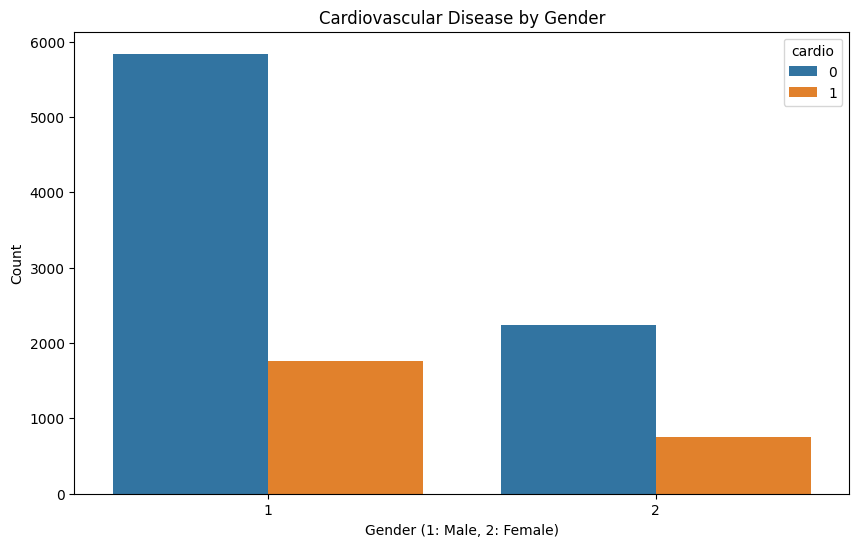

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='cardio', data=data)
plt.title('Cardiovascular Disease by Gender')
plt.xlabel('Gender (1: Male, 2: Female)')
plt.ylabel('Count')
plt.show()

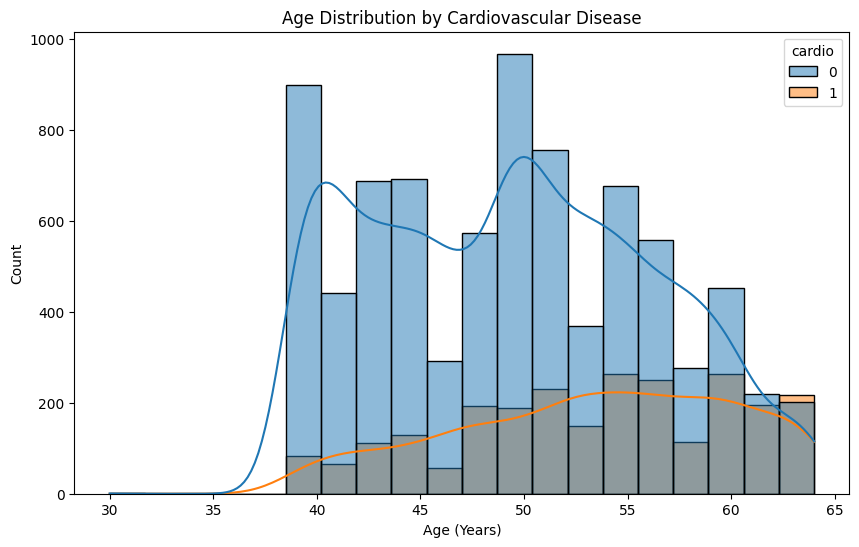

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='cardio', bins=20, kde=True)
plt.title('Age Distribution by Cardiovascular Disease')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

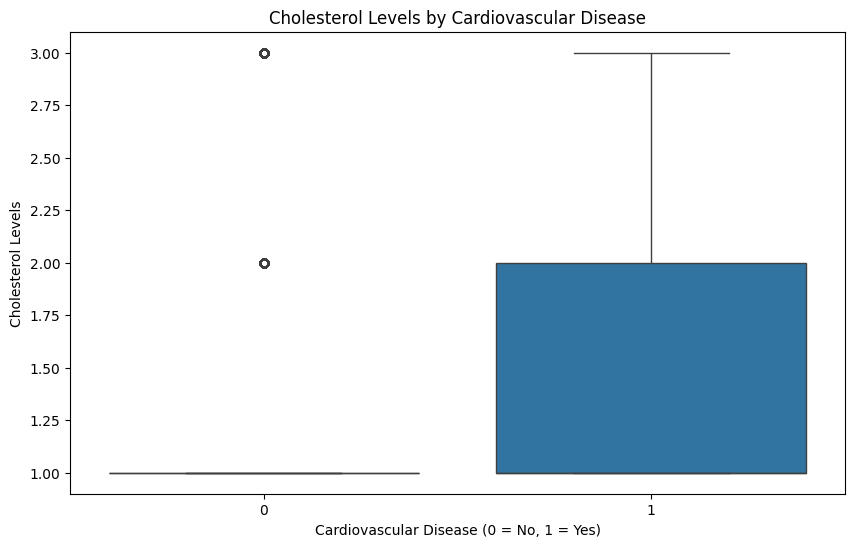

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='cholesterol', data=data)
plt.title('Cholesterol Levels by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels')
plt.show()

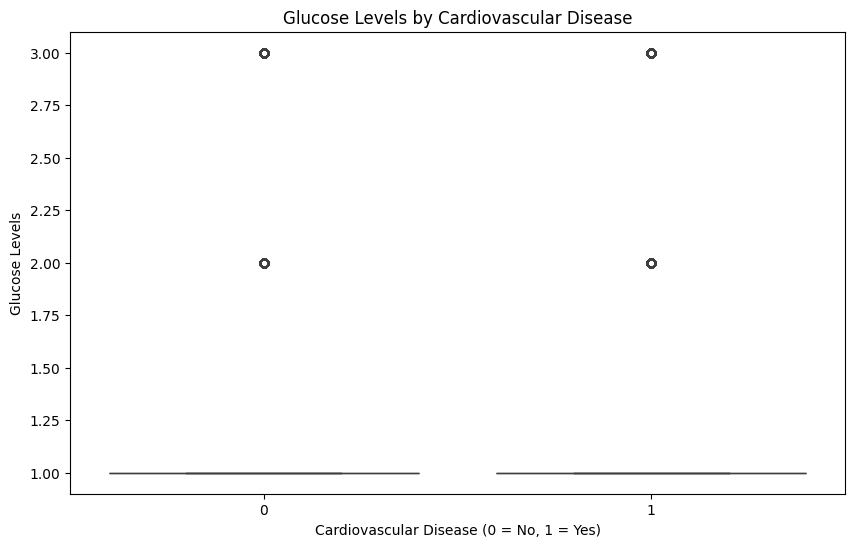

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='gluc', data=data)
plt.title('Glucose Levels by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Glucose Levels')
plt.show()

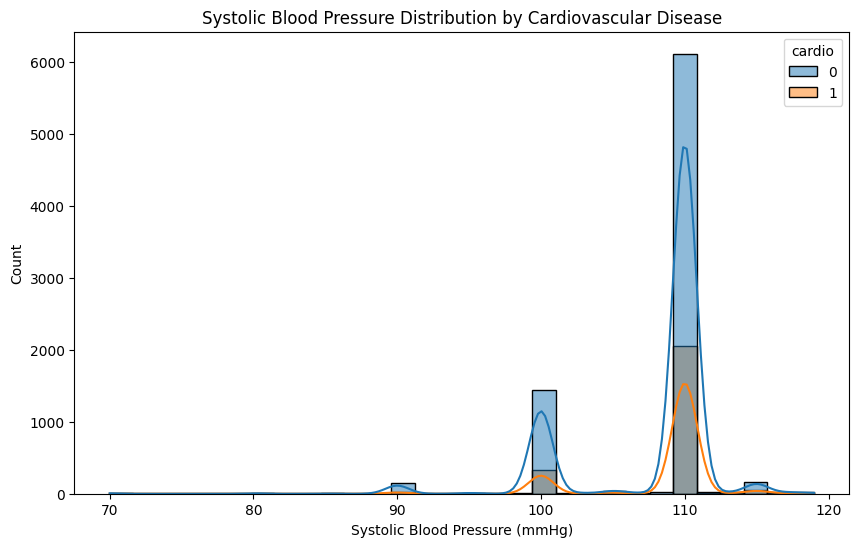

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='ap_hi', hue='cardio', bins=30, kde=True)
plt.title('Systolic Blood Pressure Distribution by Cardiovascular Disease')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

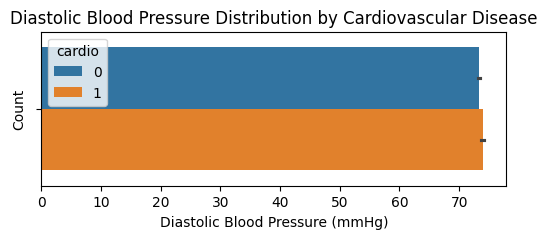

In [20]:
plt.figure(figsize=(6, 2))
sns.barplot(data=data, x='ap_lo', hue='cardio')
plt.title('Diastolic Blood Pressure Distribution by Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

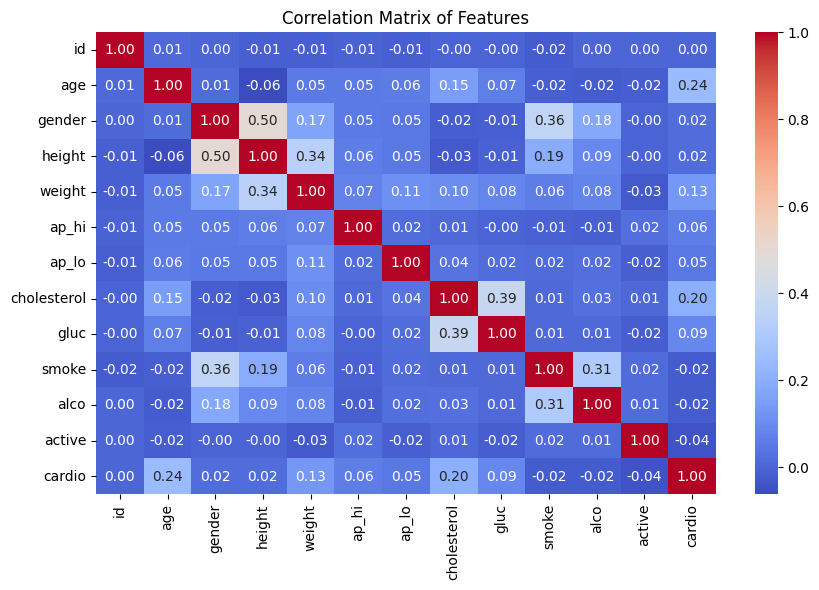

In [21]:
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_accuracies = {}
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_accuracies['Support Vector Machine'] = svm_accuracy

In [25]:
for model_name, accuracy in model_accuracies.items():
    print(f'{model_name}: {accuracy * 100:.2f}%')

Support Vector Machine: 77.28%


In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
model_accuracies['KNN'] = knn_accuracy

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = dt_accuracy

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = lr_accuracy

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = rf_accuracy

In [30]:
for model_name, accuracy in model_accuracies.items():
    print(f'{model_name}: {accuracy * 100:.2f}%')

Support Vector Machine: 77.28%
KNN: 74.07%
Decision Tree: 66.60%
Logistic Regression: 76.85%
Random Forest: 76.29%


In [33]:
y_pred_final_svm = svm_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_final_svm = accuracy_score(y_test, y_pred_final_svm)
class_report_svm = classification_report(y_test, y_pred_final_svm)
print(f'Final SVM Model Accuracy: {accuracy_final_svm * 100:.2f}%')
print('\nClassification Report:')
print(class_report_svm)
plt.show()


Final SVM Model Accuracy: 77.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1598
           1       0.76      0.11      0.19       519

    accuracy                           0.77      2117
   macro avg       0.77      0.55      0.53      2117
weighted avg       0.77      0.77      0.70      2117



Confusion Matrix:
[[1581   17]
 [ 464   55]]


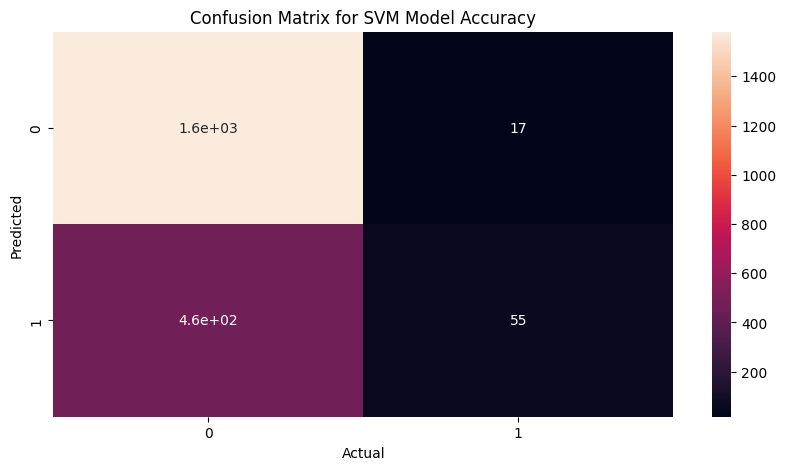

In [34]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_final_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix_svm,annot=True)
plt.title(f'Confusion Matrix for SVM Model Accuracy')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()